<a href="https://colab.research.google.com/github/visionNoob/Keras_Tutorial/blob/master/Keras_1_MLP_Regression_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression (선형 회귀) 예제 복습

# 1. 라이브러리 불러오기

In [0]:
# 1.라이브러리 불러오기
import tensorflow as tf # 딥러닝 라이브러리
import keras # 딥러닝 라이브러리
import numpy as np # 수학 계산 라이브러리
import matplotlib.pyplot as plt # 그래프 그리는 라이브러리 

# 항상 버전 확인은 필수
print(tf.__version__)
print(keras.__version__)

1.15.0-rc3
2.2.5


Using TensorFlow backend.


# 2. 랜덤 시드 설정하기 (중요!)
https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development

In [0]:
# 2.랜덤 시드 고정하기
import random
seed_value = 42 # 랜덤 시드 ; 삶, 우주, 그리고 모든 것에 대한 궁극적인 질문에 대한 해답.

random.seed(seed_value)
np.random.seed(seed_value)
tf.set_random_seed(seed_value)

# 3. 데이터셋

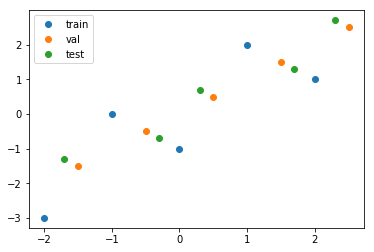

In [2]:
def preprocess_data(data):
  return data - 3

# 3. 데이터셋
# 학습 데이터 (Trianing data)
input_data = np.array([1, 2, 3, 4, 5])
output_data = np.array([0, 3, 2, 5, 4]) 

input_data = preprocess_data(input_data)
output_data = preprocess_data(output_data)

# 검증 데이터 (Validation data)
input_val_data = np.array([1.5, 2.5, 3.5, 4.5, 5.5])
output_val_data = np.array([1.5, 2.5, 3.5, 4.5, 5.5]) 

input_val_data = preprocess_data(input_val_data)
output_val_data = preprocess_data(output_val_data)

# 시험 데이터 (Test data)
input_test_data = np.array([1.3, 2.7, 3.3, 4.7, 5.3])
output_test_data = np.array([1.7, 2.3, 3.7, 4.3, 5.7]) 

input_test_data = preprocess_data(input_test_data)
output_test_data = preprocess_data(output_test_data)

# 표로 출력
plt.plot(input_data, output_data, 'o')
plt.plot(input_val_data, output_val_data, 'o')
plt.plot(input_test_data, output_test_data, 'o')
plt.legend(('train', 'val', 'test'))
plt.show()

# 4. 모델 만들기

In [0]:
# 4.모델 만들기
model = keras.models.Sequential()
model.add(keras.layers.Dense(units=16, input_shape=(1,),activation='relu'))
model.add(keras.layers.Dense(units=16, activation='relu'))
model.add(keras.layers.Dense(units=1, activation=None))


In [23]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


# 5. 모델 학습과정 설정하기

In [0]:
# 5.모델 학습과정 설정하기
# sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)
model.compile(loss='mse', optimizer='sgd', metrics=['mse'])

In [0]:
#es =  keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# 6. 모델 학습시키기

In [26]:
# 6.모델 학습시키기
history = model.fit(input_data, output_data, validation_data=(input_val_data, output_val_data), epochs=1000, batch_size=4, callbacks=[])

Train on 5 samples, validate on 5 samples
Epoch 1/1000
5/5 [==============================] - 0s 38ms/step - loss: 3.8176 - mean_squared_error: 3.8176 - val_loss: 2.6156 - val_mean_squared_error: 2.6156
Epoch 2/1000
5/5 [==============================] - 0s 3ms/step - loss: 3.5951 - mean_squared_error: 3.5951 - val_loss: 2.5199 - val_mean_squared_error: 2.5199
Epoch 3/1000
5/5 [==============================] - 0s 2ms/step - loss: 3.4339 - mean_squared_error: 3.4339 - val_loss: 2.3281 - val_mean_squared_error: 2.3281
Epoch 4/1000
5/5 [==============================] - 0s 4ms/step - loss: 3.2693 - mean_squared_error: 3.2693 - val_loss: 2.1781 - val_mean_squared_error: 2.1781
Epoch 5/1000
5/5 [==============================] - 0s 3ms/step - loss: 3.1184 - mean_squared_error: 3.1184 - val_loss: 2.1262 - val_mean_squared_error: 2.1262
Epoch 6/1000
5/5 [==============================] - 0s 3ms/step - loss: 2.9854 - mean_squared_error: 2.9854 - val_loss: 1.9881 - val_mean_squared_error: 1.98

# 7.결과 출력

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


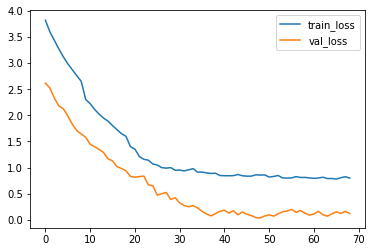

In [27]:
# Loss 출력

print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(('train_loss', 'val_loss'))
plt.show()

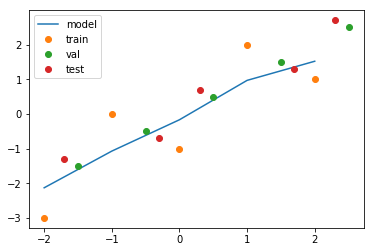

In [28]:
# 예측값 출력
yhat = model.predict(input_data)

plt.plot(input_data, yhat)
plt.plot(input_data, output_data, 'o')
plt.plot(input_val_data, output_val_data, 'o')
plt.plot(input_test_data, output_test_data, 'o')
#plt.legend(('model', 'train'))
plt.legend(('model', 'train', 'val', 'test'))
plt.show()

#7.결과 출력

In [21]:
result = model.evaluate(input_data, output_data)
print(result)
result = model.evaluate(input_val_data, output_val_data)
print(result)
result = model.evaluate(input_test_data, output_test_data)
print(result)

5/5 [==============================] - 0s 1ms/step
[6.294845888987766e-07, 6.294845888987766e-07]
5/5 [==============================] - 0s 1ms/step
[0.8184221386909485, 0.8184221386909485]
5/5 [==============================] - 0s 652us/step
[1.0561254024505615, 1.0561254024505615]
